# Correlation between vectors

In [1]:
import numpy as np
from scipy import stats
import nibabel as nib
%run nifti_tools.ipynb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Jacobian

# Complete Jacobian
jcb_main = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/MKO_MWTavg_invjcb_avg_qw_masked_200.nii'

# Windowed Jacobian (Positive)
jcb_pos = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_200.nii'

# Windowed Jacobian (Negative)
jcb_neg = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_neg_ctrst_clust_200.nii'

# Choosing the Jacobian to convert to vector
jcb_vec = nifti_to_vector(jcb_pos)

In [7]:
# Loading the Independent Components matrix
IC_arr = np.load('/data/bioprotean/ABA/ICA/components/S/S_500.npy')

In [8]:
# Creating a list to store the correlation coefficients
pearson_list = []
spearman_list = []

# Computing correlations for each component
for i in range(IC_arr.shape[1]):
    # Selecting the component
    component = IC_arr[:,i]
    
    # Computing the correlation
    pearson = stats.pearsonr(component, jcb_vec)[0]
    spearman = stats.spearmanr(component, jcb_vec)[0]
    
    # Adding to the list
    pearson_list.append(pearson)
    spearman_list.append(spearman)

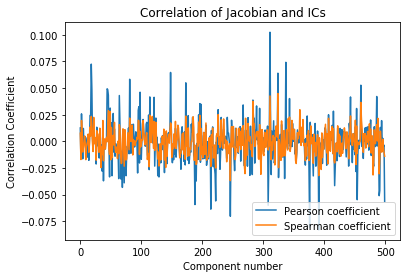

In [9]:
# Visualizing the correlation coefficients

# x vector is the component number
x = range(IC_arr.shape[1])

# Plotting the correlation coefficients
plt.plot(x, pearson_list, label='Pearson coefficient')
plt.plot(x, spearman_list, label='Spearman coefficient')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Component number")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation of Jacobian and ICs")
plt.legend(loc="lower right")

# # Setting the figure size
# plt.rcParams["figure.figsize"] = (20,10)

# To load the display window
plt.show()

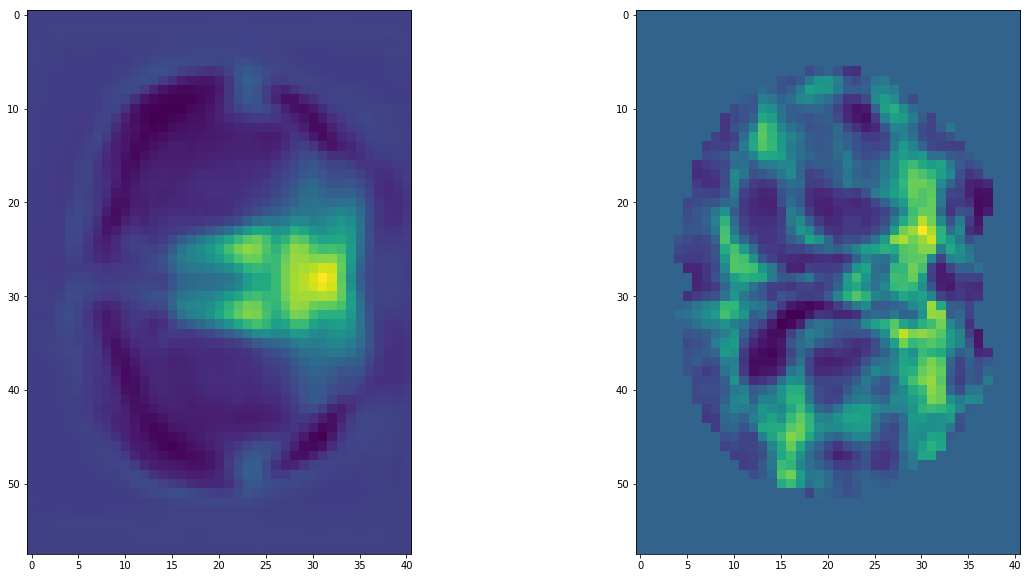

In [76]:
# Visualizing the ICs and Jacobian

# Cluster and its slice number of choice an
cluster_n = 8
slice_n = 25

# Creating the IC vector to show
IC_vol = IC_arr[:,cluster_n].reshape(67,58,41)
IC_slice = IC_vol[slice_n,:,:]

# Creating the Jacobian vector to show
jcb_vol = jcb_vec.reshape(67,58,41)
jcb_slice = jcb_vol[slice_n,:,:]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(IC_slice)
ax2.imshow(jcb_slice)
plt.show()

In [9]:
# Loading the DLSC matrix
DLSC_arr = np.load('/data/bioprotean/ABA/DLSC/dict_learning_online/code_350.npy')

In [10]:
# Creating a list to store the correlation coefficients
pearson_list = []
spearman_list = []

# Computing correlations for each component
for i in range(DLSC_arr.shape[1]):
    # Selecting the component
    component = DLSC_arr[:,i]
    
    # Computing the correlation
    pearson = stats.pearsonr(component, jcb_vec)[0]
    spearman = stats.spearmanr(component, jcb_vec)[0]
    
    # Adding to the list
    pearson_list.append(pearson)
    spearman_list.append(spearman)

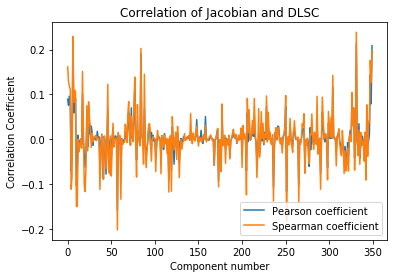

In [11]:
# Visualizing the correlation coefficients

# x vector is the component number
x = range(DLSC_arr.shape[1])

# Plotting the correlation coefficients
plt.plot(x, pearson_list, label='Pearson coefficient')
plt.plot(x, spearman_list, label='Spearman coefficient')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Component number")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation of Jacobian and DLSC")
plt.legend(loc="lower right")

# # Setting the figure size
# plt.rcParams["figure.figsize"] = (20,10)

# To load the display window
plt.show()

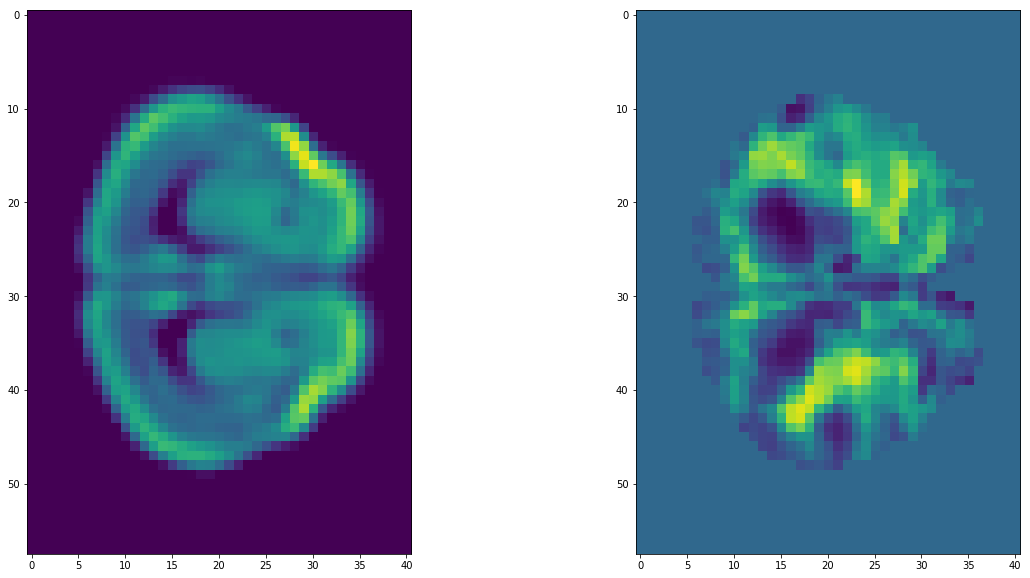

In [104]:
# Visualizing the DLSC and Jacobian

# Cluster and its slice number of choice an
cluster_n = 1
slice_n = 20

# Creating the DLSC vector to show
DLSC_vol = DLSC_arr[:,cluster_n].reshape(67,58,41)
DLSC_slice = DLSC_vol[slice_n,:,:]

# Creating the Jacobian vector to show
jcb_vol = jcb_vec.reshape(67,58,41)
jcb_slice = jcb_vol[slice_n,:,:]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(DLSC_slice)
ax2.imshow(jcb_slice)
plt.show()

In [5]:
%%bash
module load afni/20.1.11
cd /data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/
input='MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust.nii'
master='nclusters_fixed10.nii'
3dresample \
    -master $master \
    -input $input \
    -prefix MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_200.nii

3dresample: /packages/7x/anaconda3/5.3.0/lib/libuuid.so.1: no version information available (required by /lib64/libSM.so.6)
